In [375]:
import numpy as np
import pandas as pd
import random
import math
import statistics as stat
import matplotlib.pyplot as plt
from scipy import stats
import itertools
import warnings
import bisect
from simul_file import mmn_queueing_jsq, queue_length_time_graph, \
                        mmn_queueing_redundancy_dos, mmn_queueing_redundancy_doc, \
                        mmn_queueing_redundancy_dos_identical, \
                        mmn_queueing_redundancy_doc_identical, \
                        mmn_queueing_redundancy_dos_weibull, \
                        mmn_queueing_redundancy_doc_weibull,\
                        mmn_queueing_jsq_weibull, weibull_scale_calculator, \
                        system_compare
data = pd.read_excel("result_data.xlsx",sheet_name="Sheet1")

In [ ]:
mmn_queueing_jsq(n,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan,policy="jsq1")
queue_length_time_graph(event_calendar,other_stat,gtype="queue",sq_no=math.nan)
mmn_queueing_redundancy_dos(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_doc(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_dos_identical(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_doc_identical(n,d,arrival_rate,service_rate,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_dos_weibull(n,d,arrival_rate,scale,shape,simulation_time=60,simuseed=math.nan)
mmn_queueing_redundancy_doc_weibull(n,d,arrival_rate,scale,shape,simulation_time=60,simuseed=math.nan)
mmn_queueing_jsq_weibull(n,arrival_rate,scale,shape,simulation_time=60,simuseed=math.nan)
weibull_scale_calculator(desired_mean,shape)
system_compare(system1,system2)

In [5]:
aaa = mmn_queueing_jsq(4,8,2.2,simulation_time=3000,simuseed=8,policy="jsq1")
bbb = mmn_queueing_redundancy_dos(4,4,8,2.2,simulation_time=3000,simuseed=8)
#ccc = mmn_queueing_redundancy_doc(4,4,8,2.2,simulation_time=1000,simuseed=8)

In [4]:
dm = 1/2.2
shp = 1
aaa = mmn_queueing_jsq_weibull(5,10,weibull_scale_calculator(dm,shp),2,simulation_time=1000,simuseed=8)

In [5]:
dm = 1/2.2
shp = 1
bbb = mmn_queueing_redundancy_dos_weibull(5,5,10,weibull_scale_calculator(dm,shp),\
                                          shp,simulation_time=1000,simuseed=8)
ccc = mmn_queueing_redundancy_doc_weibull(5,5,10,weibull_scale_calculator(dm,shp),\
                                          shp,simulation_time=1000,simuseed=8)

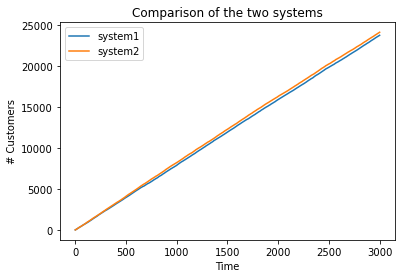

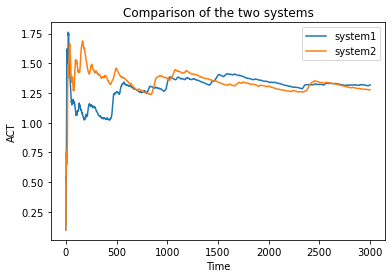

In [6]:
system_compare(aaa,bbb)

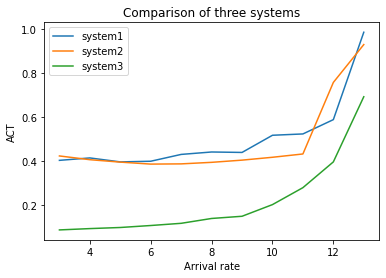

In [25]:
lb = 3
ub = 14

sys1 = np.array([])
sys2 = np.array([])
sys3 = np.array([])
for i in range(lb,ub):
    sys1 = np.append(sys1,mmn_queueing_jsq(5,i,[3,1,4,2,5],simulation_time=300,simuseed=66,policy="jsq1")[5]['Grand Average cycle time'][0])
    sys2 = np.append(sys2,mmn_queueing_redundancy_dos(5,5,i,[3,1,4,2,5],simulation_time=300,simuseed=66)[5]['Grand Average cycle time'][0])
    sys3 = np.append(sys3,mmn_queueing_redundancy_doc(5,5,i,[3,1,4,2,5],simulation_time=300,simuseed=66)[5]['Grand Average cycle time'][0])


plt.plot(np.arange(lb,ub),sys1,label='system1')
plt.plot(np.arange(lb,ub),sys2,label='system2')
plt.plot(np.arange(lb,ub),sys3,label='system3')
plt.title('Comparison of three systems')
plt.xlabel('Arrival rate')
plt.ylabel('ACT')
plt.legend()

In [36]:
aaa = mmn_queueing_jsq(5,14,[3,1,4,2,5],simulation_time=1000,simuseed=66,policy="jsq1")

In [42]:
bbb = mmn_queueing_jsq(5,15.01,[3,1,4,2,5],simulation_time=1000,simuseed=88,policy="jsq1")

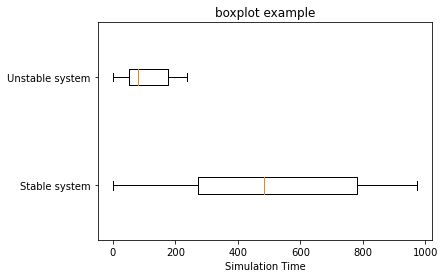

In [56]:
a0pos = aaa[0]['Time'].to_numpy()[np.where(aaa[0]['Server1 Queue']==0)[0]]
b0pos = bbb[0]['Time'].to_numpy()[np.where(bbb[0]['Server1 Queue']==0)[0]]
data = [a0pos, b0pos]
fig, ax = plt.subplots()
ax.boxplot(data,vert=False)
ax.set_yticklabels(['Stable system', 'Unstable system'])
ax.set_xlabel('Simulation Time')
ax.set_title('boxplot example')
plt.show()

How long is long?

In [395]:
s1d = 39
aaa = mmn_queueing_jsq(4,8,2.2,simulation_time=2000,policy="jsq1")
#bbb = mmn_queueing_redundancy_dos(4,4,8,2.2,simulation_time=6000,simuseed=s1d)
ccc = mmn_queueing_redundancy_doc(4,4,8,2.2,simulation_time=2000,simuseed=s1d)

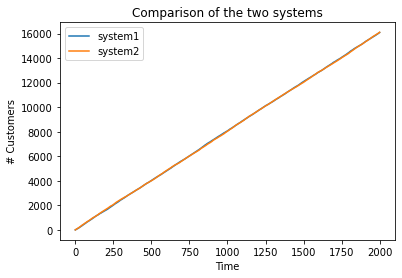

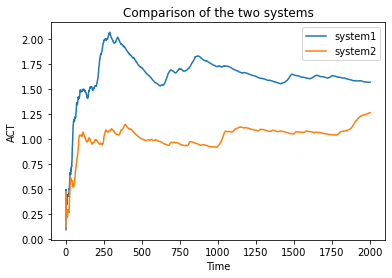

In [396]:
system_compare(aaa,ccc)

In [ ]:
aaa[8][aaa[8]['Finish']<2000]

In [ ]:
aaa[8]

In [374]:
stats.ttest_rel(data['How long is long? (2000)-homo'], data['How long is long? (4000)-homo'])

Ttest_relResult(statistic=0.6235277145514919, pvalue=0.53656774714141)

In [391]:
def yyy(system1):
    
    bbb = system1[0].iloc[np.where(system1[0]["Time"][1:].to_numpy() != system1[0]["Next Customer"][:-1].to_numpy())[0][:-1]+1,:]
    sys1_timing = system1[8]
    sys1_timing['act'] = sys1_timing['Finish'] - sys1_timing['Start']
    sys1_timing['cma'] = sys1_timing['act'].expanding().mean()

    plt.plot(bbb['Time'],sys1_timing['cma'],label='jsq1')
    #plt.title('Warm up period')
    plt.xlabel('Time')
    plt.ylabel('ACT')
    plt.legend()

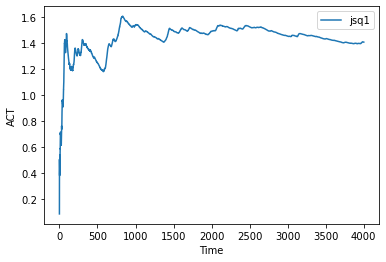

In [392]:
yyy(aaa)

Stability Analysis

In [ ]:
queue_length_time_graph(event_calendar,other_stat,gtype="queue",sq_no=math.nan)

Homo

In [831]:
s1d = 13
#aaa = mmn_queueing_jsq_weibull(4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
#bbb = mmn_queueing_redundancy_dos_weibull(4,4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)
ccc = mmn_queueing_redundancy_doc_weibull(4,4,8,weibull_scale_calculator(1/2.2,0.5),0.5,simulation_time=2000,simuseed=s1d)

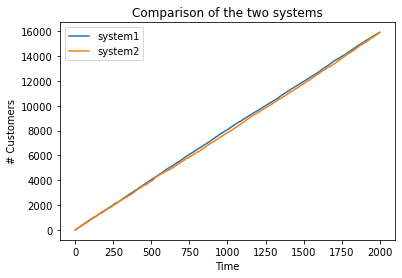

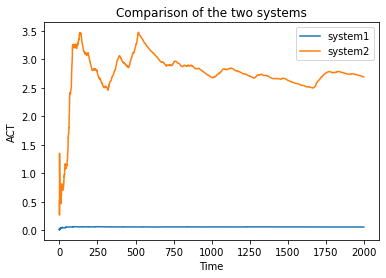

In [832]:
system_compare(ccc,ddd)

In [833]:
ccc[8]

,Arrival_label,Start,Queue,Finish,Server,act,cma
1,1.0,0.037471,0.037471,0.046329,1.0,0.008858,0.008858
2,2.0,0.181971,0.181971,0.182260,3.0,0.000289,0.004573
3,3.0,0.326005,0.326005,0.405406,1.0,0.079401,0.029516
4,4.0,0.562593,0.562593,0.562613,2.0,0.000020,0.022142
5,5.0,0.588275,0.588275,0.588514,3.0,0.000239,0.017761
...,...,...,...,...,...,...,...
15920,15920.0,1999.408007,1999.408007,1999.408312,4.0,0.000305,0.055392
15921,15921.0,1999.412585,1999.412585,1999.413299,2.0,0.000714,0.055389
15922,15922.0,1999.666517,1999.666517,1999.671093,3.0,0.004577,0.055385
15923,15923.0,1999.772660,1999.772660,1999.779583,1.0,0.006924,0.055382
